In [3]:
import pandas as pd


In [4]:
df_train = pd.read_csv('/home/niangu/桌面/TensorFlow/data/Breast-Cancer/breast-cancer-train.csv')
df_test = pd.read_csv('/home/niangu/桌面/TensorFlow/data/Breast-Cancer/breast-cancer-test.csv')


In [5]:
#选取‘Clump Thickness’与‘Cell Size’作为特征，构建测试集中的正负分类样本
df_test_negative = df_test.loc[df_test['Type']==0][['Clump Thickness', 'Cell Size']]
df_test_positive = df_test.loc[df_test['Type']==1][['Clump Thickness', 'Cell Size']]

In [6]:
import matplotlib.pyplot as plt

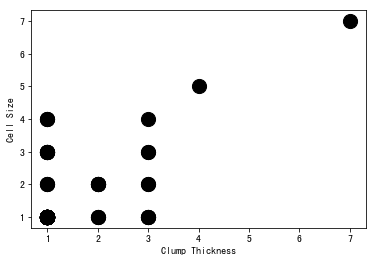

In [7]:
#绘制良性肿瘤样本点，标记为红色的o
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'], marker='o', s=200, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [8]:
import numpy as np


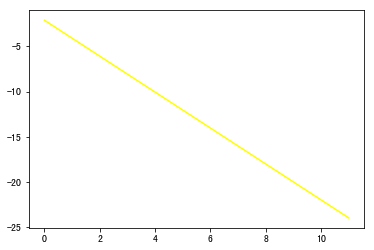

In [9]:
#利用numpy中的random函数随机采样直线的截距和系数
intercept = np.random.random([1])
coef = np.random.random([2])
lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]
#绘制一条随机直线
plt.plot(lx, ly, c='yellow')

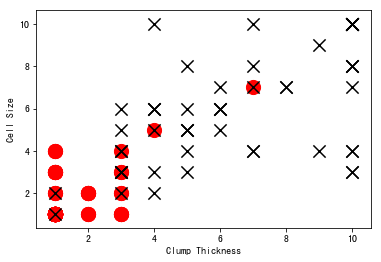

In [10]:
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'], marker='o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'], marker='x', s=150, c= 'black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression#逻辑斯蒂回归分类器
lr = LogisticRegression()

In [14]:
#使用前10条训练样本学习直线的系数和截距
lr.fit(df_train[['Clump Thickness', 'Cell Size']][:10], df_train['Type'][:10])
print('Testing accuracy (all training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))
intercept = lr.intercept_
coef = lr.coef_[0, :]
ly = (-intercept - lx * coef[0]) / coef[1]
      

Testing accuracy (all training samples): 0.8685714285714285


/home/niangu/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


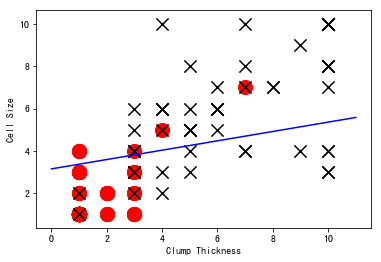

In [17]:
plt.plot(lx, ly, c='blue')
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'], marker='o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'], marker='x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()